In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("AQI_HaNoi_Updated.csv")
df.head()

,date,pm25,pm10,o3,no2,so2,co,year,AQI_pm25,AQI_pm10,AQI_o3,AQI_no2,AQI_so2,AQI_co,AQI
0,2019-01-01,86.0,19.0,23.0,27.0,5.0,3.0,NaN,154.285714,19.0,7.1875,13.5,2.0,15.0,154.285714
1,2019-01-01,84.0,42.0,15.0,27.0,14.0,8.0,NaN,152.857143,42.0,4.6875,13.5,5.6,40.0,152.857143
2,2019-01-02,60.0,52.0,17.0,13.0,16.0,4.0,NaN,116.666667,51.0,5.3125,6.5,6.4,20.0,116.666667
3,2019-01-02,46.0,56.0,19.0,11.0,8.0,10.0,NaN,92.000000,53.0,5.9375,5.5,3.2,50.0,92.000000
4,2019-01-03,39.0,36.0,23.0,12.0,6.0,6.0,NaN,78.000000,36.0,7.1875,6.0,2.4,30.0,78.000000


In [2]:
train_dates= pd.to_datetime(df['date'])
df = df.drop(columns={'year'})
df

,date,pm25,pm10,o3,no2,so2,co,AQI_pm25,AQI_pm10,AQI_o3,AQI_no2,AQI_so2,AQI_co,AQI
0,2019-01-01,86.0,19.0,23.0,27.0,5.0,3.0,154.285714,19.0,7.1875,13.5,2.0,15.0,154.285714
1,2019-01-01,84.0,42.0,15.0,27.0,14.0,8.0,152.857143,42.0,4.6875,13.5,5.6,40.0,152.857143
2,2019-01-02,60.0,52.0,17.0,13.0,16.0,4.0,116.666667,51.0,5.3125,6.5,6.4,20.0,116.666667
3,2019-01-02,46.0,56.0,19.0,11.0,8.0,10.0,92.000000,53.0,5.9375,5.5,3.2,50.0,92.000000
4,2019-01-03,39.0,36.0,23.0,12.0,6.0,6.0,78.000000,36.0,7.1875,6.0,2.4,30.0,78.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2024-05-28,85.0,56.0,14.0,1.0,8.0,6.0,153.571429,53.0,4.3750,0.5,3.2,30.0,153.571429
2097,2024-05-29,58.0,50.0,13.0,1.0,8.0,6.0,113.333333,50.0,4.0625,0.5,3.2,30.0,113.333333
2098,2024-05-30,47.0,39.0,10.0,1.0,8.0,8.0,94.000000,39.0,3.1250,0.5,3.2,40.0,94.000000
2099,2024-05-31,48.0,63.0,10.0,1.0,8.0,8.0,96.000000,56.5,3.1250,0.5,3.2,40.0,96.000000


In [3]:
cols = ['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI']
df = df[cols]
df.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-01,86.0,19.0,23.0,27.0,5.0,3.0,154.285714
1,2019-01-01,84.0,42.0,15.0,27.0,14.0,8.0,152.857143
2,2019-01-02,60.0,52.0,17.0,13.0,16.0,4.0,116.666667
3,2019-01-02,46.0,56.0,19.0,11.0,8.0,10.0,92.000000
4,2019-01-03,39.0,36.0,23.0,12.0,6.0,6.0,78.000000


In [4]:
# Chia train, test
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]
X_train = train_data.drop(['date', 'AQI'], axis=1)
y_train = train_data['AQI']

X_test = test_data.drop(['date', 'AQI'], axis=1)
y_test = test_data['AQI']

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [6]:
y_pred

array([ 81.74914111,  74.52759837,  75.6696697 ,  95.91936823,
       113.01180301,  85.60192063,  77.86377569,  83.7362041 ,
       107.2202482 ,  75.96600158,  87.49189967,  80.60309684,
        77.20788622,  75.48316586,  80.81409337,  83.55540902,
        85.67378622, 109.01109504, 113.22674381,  85.2561834 ,
        66.6809931 ,  64.74052873,  56.04936462,  75.97826937,
        84.65492848,  81.15150708,  85.2835653 ,  80.93837766,
        74.79165178,  70.02878577,  52.40818003, 107.53657124,
        93.73456668,  97.41964224, 121.82554094, 101.20536125,
       121.15165496,  78.81107524,  90.94235595, 104.56469389,
        57.13792972,  63.10822736,  92.0141124 , 116.61434092,
       142.17234495, 107.11952751, 133.42309085,  93.38040176,
       101.90324009, 139.9009683 , 119.78530261,  65.33429214,
        68.05830321,  91.08419778,  42.00739824,  40.26231662,
        38.0684693 ,  37.89850645,  85.85622563, 163.46611445,
       149.78602956, 129.44536928, 114.61367132,  84.93

In [12]:
# Dự đóa 30 ngày
days_pred_30 = 30
cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
_30_next_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
_30_next_days_index

RangeIndex(start=2100, stop=2130, step=1)

In [13]:
pred_30_days = model.predict(X_test[-days_pred_30:])
pred_30_days

array([123.70940878, 122.87835943, 136.48008844, 144.63926668,
       129.43593753, 113.78030266,  98.06796705, 130.92687262,
       108.04013186,  98.60619181,  87.68734762, 137.2885393 ,
       107.80732058, 146.80631791, 133.68269343,  91.246478  ,
        90.54259195, 110.94101002, 149.86397643, 147.54755187,
       151.24671543, 159.52651535,  78.98623888,  68.07966249,
       107.2420856 , 141.64777019, 105.13551614,  90.07732845,
        91.98595473, 158.72858065])

In [16]:
# Dự đóa 60 ngày
days_pred_60 = 60
_60_next_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+59, step=1)
pred_60_days = model.predict(X_test[-days_pred_60:])
pred_60_days

array([178.05802034, 161.18256376, 119.36449099, 111.56090991,
       114.06215649,  87.22887133, 133.82907158, 160.55870136,
       142.3348117 , 122.97825605, 100.49683056,  74.56341431,
       107.14411391,  95.06007687, 103.30140271,  89.97042799,
       108.00201868, 110.15416408, 113.33487785, 125.68829782,
        93.59450052, 211.8387356 , 168.61850816, 180.47359906,
       186.43529572,  96.97852103, 141.50903425, 139.87844885,
       121.84554644, 124.5993726 , 123.70940878, 122.87835943,
       136.48008844, 144.63926668, 129.43593753, 113.78030266,
        98.06796705, 130.92687262, 108.04013186,  98.60619181,
        87.68734762, 137.2885393 , 107.80732058, 146.80631791,
       133.68269343,  91.246478  ,  90.54259195, 110.94101002,
       149.86397643, 147.54755187, 151.24671543, 159.52651535,
        78.98623888,  68.07966249, 107.2420856 , 141.64777019,
       105.13551614,  90.07732845,  91.98595473, 158.72858065])

In [17]:
# Dự đóa 90 ngày
days_pred_90 = 90
_90_next_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+89, step=1)
pred_90_days = model.predict(X_test[-days_pred_90:])
pred_90_days

array([224.8407032 , 293.31791829, 251.7743676 , 203.82892047,
       255.31741189, 232.64700221, 114.73970283, 127.42382533,
       226.25770763, 185.1920331 , 138.77493368, 173.34090471,
       124.66831334, 134.50759889, 118.31235714, 114.78148571,
       146.80800544, 202.65149588, 176.9074063 , 128.90566219,
       123.79238158, 123.65796238, 124.66682549, 152.33387518,
       147.28584556, 166.90066277, 165.66136567, 173.92283902,
       185.87786194, 166.2719038 , 178.05802034, 161.18256376,
       119.36449099, 111.56090991, 114.06215649,  87.22887133,
       133.82907158, 160.55870136, 142.3348117 , 122.97825605,
       100.49683056,  74.56341431, 107.14411391,  95.06007687,
       103.30140271,  89.97042799, 108.00201868, 110.15416408,
       113.33487785, 125.68829782,  93.59450052, 211.8387356 ,
       168.61850816, 180.47359906, 186.43529572,  96.97852103,
       141.50903425, 139.87844885, 121.84554644, 124.5993726 ,
       123.70940878, 122.87835943, 136.48008844, 144.63

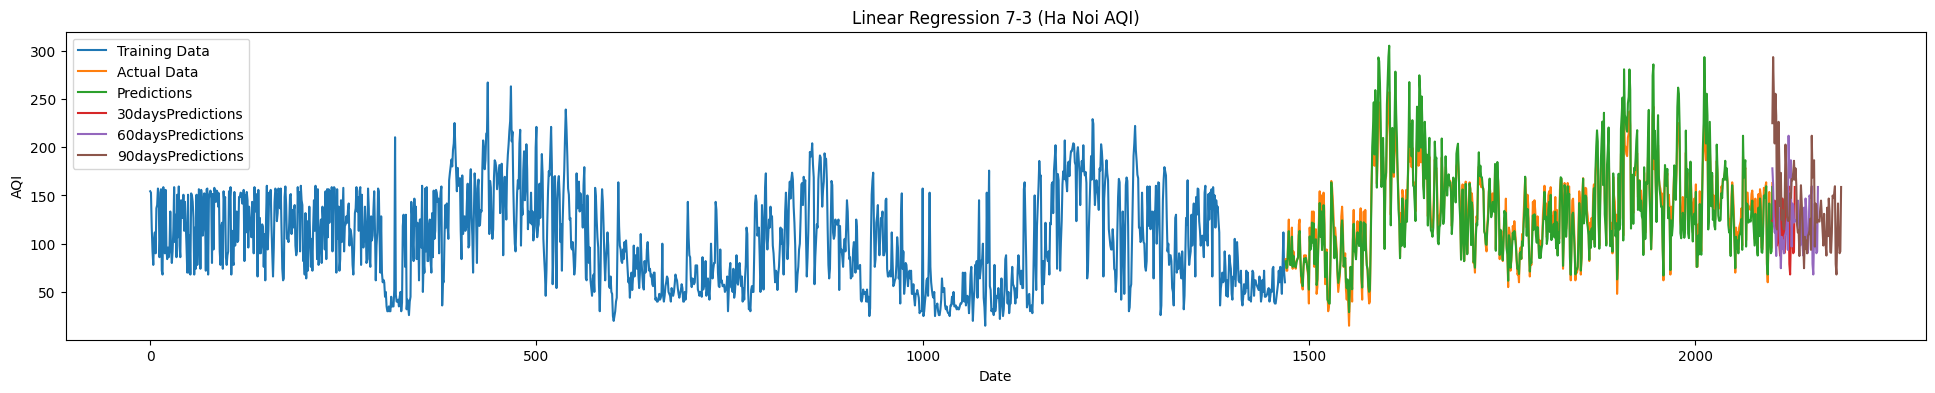

In [18]:
plt.figure(figsize=(24, 4))
plt.plot(train_data.index, train_data['AQI'], label='Training Data')
plt.plot(test_data.index, test_data['AQI'], label='Actual Data')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.plot(_30_next_days_index, pred_30_days, label='30daysPredictions')
plt.plot(_60_next_days_index, pred_60_days, label='60daysPredictions')
plt.plot(_90_next_days_index, pred_90_days, label='90daysPredictions')
plt.title('Linear Regression 7-3 (Ha Noi AQI)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 7.65%
MAE: 10.45
RMSE: 13.74
